In [85]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [86]:
#Points coordinats for two NSU documents 

#Договор на общагу НГУ №1
dog1 = [((1497, 231), (1505,254)),
((1567, 238), (1604, 252)),
((1586, 423), (2355, 452)),
((568, 598), (582, 612)),
((998, 598), (1012, 615)),
((1046, 601), (1061, 618)),
((1146, 604), (1158, 619)),
((1898,314), (1912, 332))]

# Договор на общагу НГУ №2
dog2 = [((672, 1694),(692, 1708)),
((748, 1696), (772, 1709)),
((1725, 2281), (2394,2297)),
((1393, 2320), (1954, 2333)),
((1799, 2361), (2203, 2377)),
((1179, 2773), (1711, 2826))]


# Договор на повторный курс НГУ
dog3 = [((354,1108),(1976,1140)),
       ((510,1212),(1274,1242)),
       ((1434,1214),(1862,1240)),
       ((1562,1214),(1862,1240)),
       ((1958,1208),(2030,1236)),
       ((358,1262),(2268,1302)),
       ((1206,1376),(2292,1404)),
       ((1630,1476),(2290,1500)),
       ((495,1516),(2292,1542)),
       ((1786,1822),(2270,1846)),
       ((1632,1914),(2166,1940)),
       ((1380,2060),(1746,2086)),
       ((1768,2058),(2188,2084))]

# Nist договор #1
nist_rect = [((600,336),(1890,364)),
((596,430),(1900,468)),
((596,538),(1898,564)),
]

tet = [((372,1164),(1928,1192)),
((520,1256),(1234,1286)),
((1412,1264),(1474,1288)),
((1550,1264),(1776,1288)),
((1914,1264),(1962,1288)),
((374,1324),(2196,1358)),
((1180,1428),(2238,1440)),
((1594,1524),(2234,1542)),
((496,1564),(2234,1588)),
((1766,1856),(2182,1880)),
((1604,1934),(2096,1966)),
((1348,2084),(1696,2108)),
((1756,2070),(2134,2106))
]

In [87]:
test1 = cv2.imread('doc.jpg', cv2.IMREAD_GRAYSCALE)
#cv2.namedWindow('exm', cv2.WINDOW_NORMAL)
#cv2.imshow ('exm',test1)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [88]:
   def calc_image(img):
    """
    Функция возвращает процент чернил в картинке
    """
    thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    count_of_pixel = np.count_nonzero(thresholded)
    percent = 100 * np.count_nonzero(thresholded) / (img.shape[0] * img.shape[1])

    return percent

def is_signature(img, threshold=4):
    """
    Проверяем есть ли подпись в ``img``
    :param threshold: порог, при котором мы считаем, что подпись есть
    :param img: вырезанное изображение подписи
    :return: true/false
    """
    percent = calc_image(img)
    return percent > threshold, round(percent, 3)

In [89]:
# x and y coordinates mixed up with each other
def is_valid(document, rects):
    for rect in rects:
        p1,p2 = rect
        x1,y1 = p1
        x2,y2 = p2
        valid = True
        field_img = document[y1:y2,x1:x2]
        #cv2.imshow('test', field_img)
        #fig = plt.figure(figsize=(17,15), dpi=120, facecolor='w', edgecolor='k')
        plt.imshow(field_img, cmap = 'gray')
        print(field_img.shape)
        plt.xticks([]), plt.yticks([])
        plt.show()
        flag = is_signature(field_img)
        print (flag)
        if flag[0] == False:
            valid = False
            #print ('Not full')
            break
    return valid

(28, 1556)


(True, 12.399)
(30, 714)


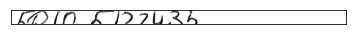

(True, 10.63)
(24, 62)


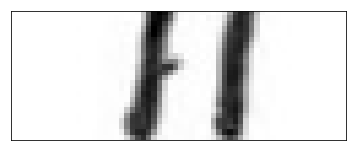

(True, 16.465)
(24, 226)


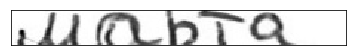

(True, 23.378)
(24, 48)


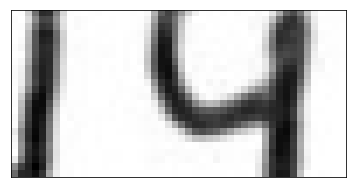

(True, 29.514)
(34, 1822)


(True, 5.046)
(12, 1058)


(True, 6.341)
(18, 640)


(True, 11.354)
(24, 1738)


(True, 4.183)
(24, 416)


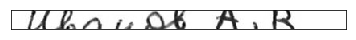

(True, 18.109)
(32, 492)


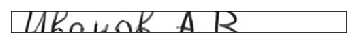

(True, 13.205)
(24, 348)


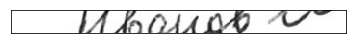

(True, 19.217)
(36, 378)


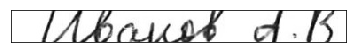

(True, 19.775)
True


In [90]:
print (is_valid(test1, tet))